# Practical Data Science Cycle

1. Data Cleaning 
2. Analysis
3. Modelling 
4. Review 


# load data

In [31]:
import pandas as pd

df_train = pd.read_csv(r'train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Description 

![Alt text](image.png)

# Data Cleaning

1. which feature are categorical and which are numerical?
2. Available Data Types?
3. None, Blank or empty bvalues?

---

## Which Features are Categorical and which are Numerical?

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [33]:
print("Categorical Variables")
categorical_v = df_train.select_dtypes(include=['object']).columns
for col in categorical_v:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [34]:
print("Numerical Variables")
numerical_v = df_train._get_numeric_data().columns
for col in numerical_v:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


---

## Cleaning Nan or Empty values

In [35]:
for col in df_train.columns:
    print(col, df_train[col].isnull().sum())

PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


In [36]:
for col in df_train.columns:
    percentage_null = str(df_train[col].isnull().sum()/len(df_train)*100) + "%"
    print(col, percentage_null)

PassengerId 0.0%
HomePlanet 2.312205222592891%
CryoSleep 2.4962613597147127%
Cabin 2.289198205452663%
Destination 2.093638559760727%
Age 2.0591280340503855%
VIP 2.3352122397331185%
RoomService 2.082135051190613%
FoodCourt 2.105142068330841%
ShoppingMall 2.392729782583688%
Spa 2.105142068330841%
VRDeck 2.1626596111814105%
Name 2.300701714022777%
Transported 0.0%


In [37]:
len(df_train)

8693

Approaches to handle with None values:

1. Replace None values with the most common values in the column (in the case categorical variables)
2. Remove the rows that have None values
3. Replace the values with the mean (for numerical values, continuous)

For this example, we are: 

Categorical variables 
- Doing number 1 

Numerical variables 
- Doing number 3

In [38]:
# Replace None values with the most common values in the column

for cat_v in categorical_v:
    if cat_v != 'Name':
        df_train[cat_v].fillna(df_train[cat_v].mode()[0], inplace=True)

In [39]:
for col in categorical_v:
    print(col, df_train[col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 200


In [40]:
for num_col in numerical_v:
    df_train[num_col].fillna(df_train[num_col].mean(), inplace=True)

In [41]:
for num_col in numerical_v:
    print(num_col, df_train[num_col].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0


# Analysis 

1. Data Exploration 
2. Data Visualization 
3. Feautre Engineering 

## Data Exploration

In [42]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [43]:
df_train.describe(include=["O"])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,5281_01,Earth,G/734/S,TRAPPIST-1e,Apix Wala
freq,1,4803,207,6097,2


In [44]:
# Dropping the name column since is irrelevant for the tendence

df_train.drop(['Name'], axis=1, inplace=True)

In [45]:


categorical_v = df_train.select_dtypes(include=['object']).columns
categorical_v  

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

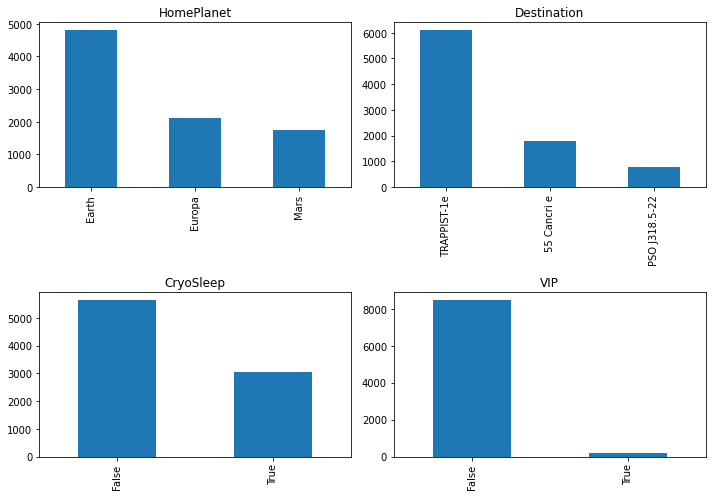

In [46]:
# plot the categorical and bool variables 

import matplotlib.pyplot as plt 

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df_train['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df_train['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df_train['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df_train['VIP'].value_counts().plot(kind='bar', title='VIP')
plt.tight_layout()


In [47]:
df_train['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [48]:
numerical_v = list(numerical_v)

numerical_v.remove('Transported')

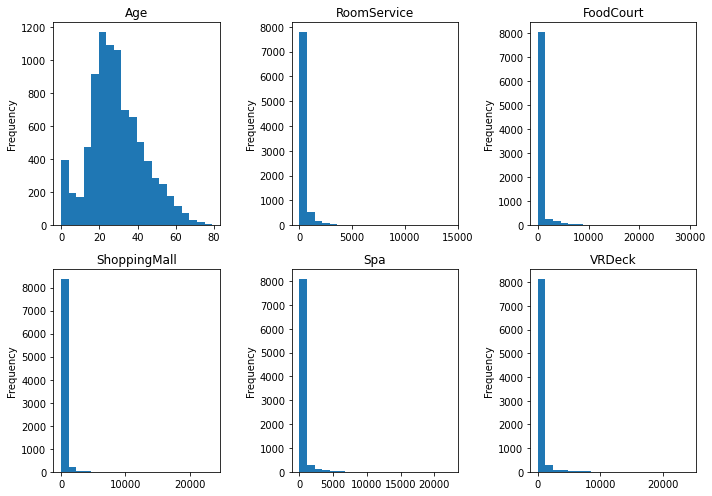

In [49]:
plt.figure(figsize=(10,7))
for i, num_col in enumerate(numerical_v):
    plt.subplot(2,3,i+1)
    df_train[num_col].plot(kind='hist',bins=20)
    plt.title(num_col)

plt.tight_layout()

# Feature Engineering 

1. Build 2 feautes out of 'Cabin' column: deck and port 

In [50]:
import numpy as np

# building the deck and port features form the 'Cabin' column 
df_train['Deck'] = df_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_train['Port'] = df_train['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df_train['Deck'] = df_train['Deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':5,'C':6,'T':7})
df_train['Port'] = df_train['Port'].map({'P':0, 'S':1}).astype(int)
df_train.drop(['Cabin'],axis=1,inplace=True)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2.0,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2.0,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,1


In [51]:
df_train['HomePlanet'] = df_train['HomePlanet'].map({'Earth':0, 'Europa':1,'Mars':2})
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2.0,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2.0,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,1


In [52]:
df_train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [53]:
df_train.drop(columns=['PassengerId'],inplace=True)

In [54]:
df_train['Destination'] = df_train['Destination'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1,'55 Cancri e':2})
# df_train['VIP'] = df_train['VIP'].map({'False':0,'True':1})
# df_train['CryoSleep'] = df_train['CryoSleep'].map({'False':0,'True':1})

df_train['VIP'] = df_train['VIP'].astype(int)
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)

df_train.head()



,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1.0,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2.0,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2.0,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1.0,1


In [25]:
df_train.to_csv('Data_cleaned.csv',index=False)

In [56]:
def count_nan_inf(df):
  """Counts the number of NaN and inf values in each column of a DataFrame.

  Args:
    df: A Pandas DataFrame.

  Returns:
    A Pandas Series containing the number of NaN and inf values in each column of the DataFrame.
  """

  return df.isna().sum()


# Count the number of NaN and inf values in each column
counts = count_nan_inf(df_train)

# Print the results
print(counts)

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck            478
Port              0
dtype: int64


# Modelling 

1. Train and test split from our tranning data 
2. Fit few models: Logistic Regression, Random Forest, Gradient Boosting 
3. Plot the Results  

In [26]:
#1: 

#Dropping the "Transported" column from the df_train DataFrame.
#Converting the df_train DataFrame to a NumPy array.  

X = df_train.drop(columns=['Transported'], axis=1).values
y = df_train['Transported'].values 

In [27]:
from sklearn.model_selection import train_test_split

x_train, y_train, x_test, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6954, 12), (1739, 12), (6954,), (1739,))

In [28]:
#2: Fit a few models: Logistic  Regression 
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pre_score = lg.score(x_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').